# Settings Environment

In [1]:
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

--------
# EDA

In [2]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


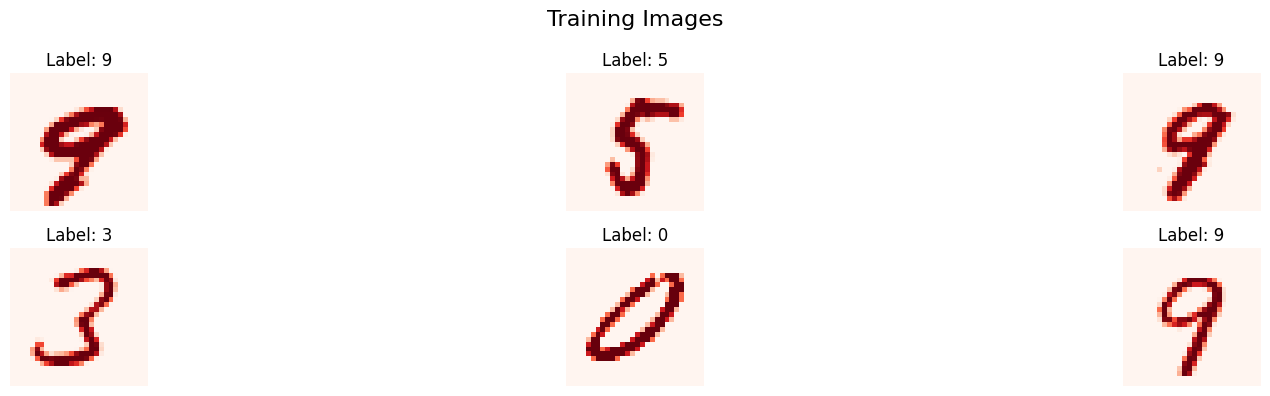

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 4))
axes = axes.flatten()

for i in range(6):
    random_image = random.randint(0,df_train.shape[0]) 
    image = df_train.iloc[random_image, 1:].values
    label = df_train.iloc[random_image, 0]
    
    image_data = image.reshape(28, 28)
    
    axes[i-1].imshow(image_data, cmap='Reds')
    axes[i-1].set_title(f'Label: {label}')
    axes[i-1].axis('off') 

plt.suptitle("Training Images", size=16)
plt.tight_layout()
plt.show()

In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [8]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [9]:
df_train.isna().sum().sum()

0

In [10]:
df_test.isna().sum().sum()

0

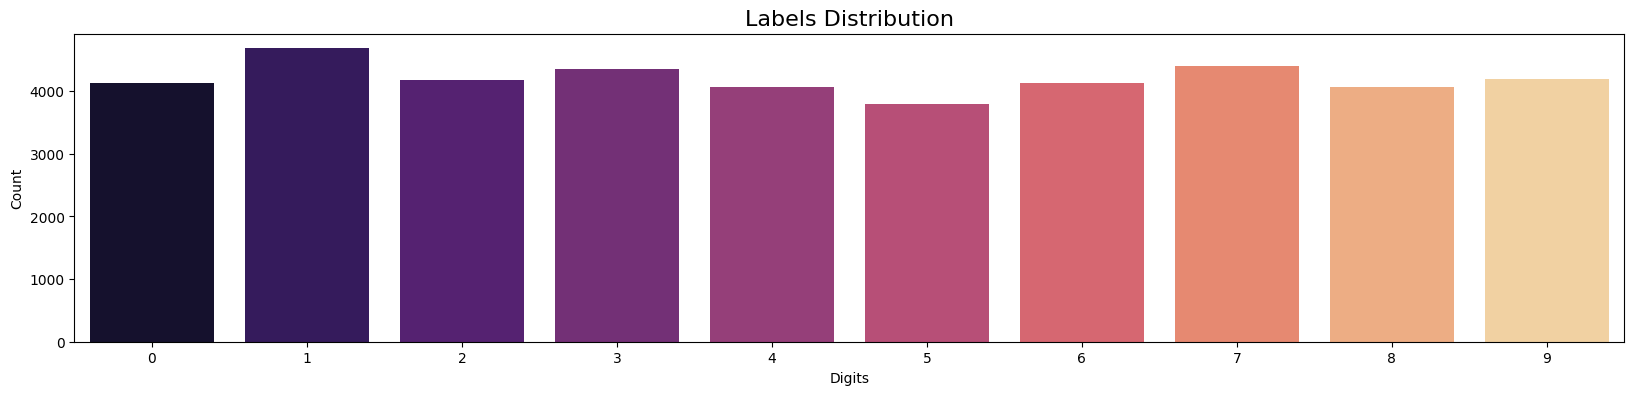

In [11]:
plt.figure(figsize=(20,4))
sns.countplot(df_train, x='label', palette='magma')
plt.title("Labels Distribution", size=16)
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

In [12]:
X = df_train.drop(columns='label')
y = df_train['label']

In [13]:
X.shape, y.shape

((42000, 784), (42000,))

--------
# FLAML

- Learning by documentation >> [FLAML](https://microsoft.github.io/FLAML/)
- Notebook Base >> [Colab FLAML](https://colab.research.google.com/github/microsoft/FLAML/blob/main/notebook/automl_classification.ipynb#scrollTo=TCE2xLMnrKBO)

In [14]:
!pip install flaml -q

In [15]:
!pip install -U ipywidgets -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

In [18]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [19]:
from flaml import AutoML
automl = AutoML()

2024-09-14 23:59:19,902	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-09-14 23:59:20,607	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [20]:
settings = {
    "time_budget": 600,
    "metric": 'accuracy', 
    "task": 'classification',
    "log_file_name": 'experiment_v0.log',
    "seed": 123456, 
}

In [21]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 09-14 23:59:34] {1680} INFO - task = classification
[flaml.automl.logger: 09-14 23:59:34] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 09-14 23:59:35] {1789} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 09-14 23:59:35] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 09-14 23:59:35] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-14 23:59:37] {2345} INFO - Estimated sufficient time budget=21429s. Estimated necessary time budget=526s.
[flaml.automl.logger: 09-14 23:59:37] {2392} INFO -  at 14.5s,	estimator lgbm's best error=0.2535,	best estimator lgbm's best error=0.2535
[flaml.automl.logger: 09-14 23:59:37] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-14 23:59:41] {2392} INFO -  at 18.4s,	estimator lgbm's best error=0.2502,	best estimator lgbm's best error=0.2502
[flaml.automl

In [22]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 69, 'num_leaves': 8, 'min_child_samples': 9, 'learning_rate': 0.6141197326882022, 'log_max_bin': 6, 'colsample_bytree': 0.9633756976393719, 'reg_alpha': 0.004150026781900772, 'reg_lambda': 3.6508919022720656}
Best accuracy on validation data: 0.9632
Training duration of best run: 38.28 s


In [23]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.9633756976393719,
               learning_rate=0.6141197326882022, max_bin=63,
               min_child_samples=9, n_estimators=1, n_jobs=-1, num_leaves=8,
               reg_alpha=0.004150026781900772, reg_lambda=3.6508919022720656,
               verbose=-1)

In [24]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

-----

# Evaluation

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def full_evaluation(X_true, y_true, estimator):
    df_model_evaluation = {
        'accuracy_score': [],
        'recall_score': [],
        'f1_score': [],
        'precision_score': [],
    }

    y_preds = estimator.predict(X_valid)
    df_model_evaluation['accuracy_score'].append(accuracy_score(y_valid, y_preds))  
    df_model_evaluation['recall_score'].append(recall_score(y_valid, y_preds, average='micro'))
    df_model_evaluation['f1_score'].append(f1_score(y_valid, y_preds, average='micro'))
    df_model_evaluation['precision_score'].append(precision_score(y_valid, y_preds, average='micro'))

        
    return pd.DataFrame(df_model_evaluation)

In [26]:
full_evaluation(X_train, y_train, automl)

,accuracy_score,recall_score,f1_score,precision_score
0,0.964643,0.964643,0.964643,0.964643


In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report

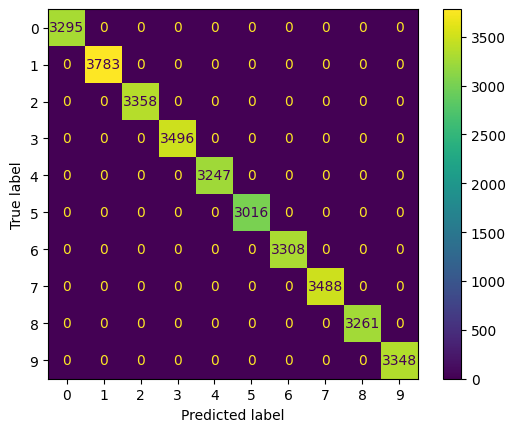

In [28]:
conf_matrix = confusion_matrix(y_train, automl.predict(X_train))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [29]:
full_evaluation(X_valid, y_valid, automl)

,accuracy_score,recall_score,f1_score,precision_score
0,0.964643,0.964643,0.964643,0.964643


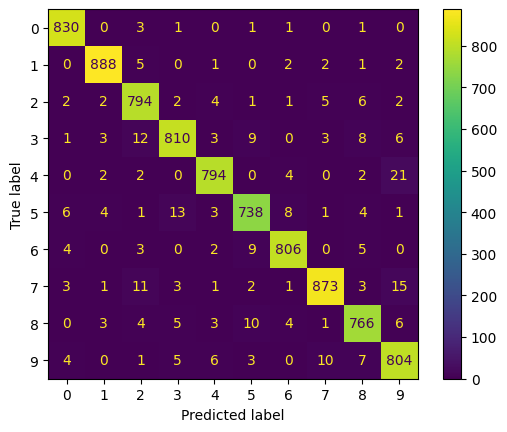

In [30]:
conf_matrix = confusion_matrix(y_valid, automl.predict(X_valid))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [31]:
from pprint import pprint
from flaml.automl.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    pprint(config)

{'Best Hyper-parameters': {'colsample_bytree': 1.0,
                           'learning_rate': 0.09999999999999995,
                           'log_max_bin': 8,
                           'min_child_samples': 20,
                           'n_estimators': 4,
                           'num_leaves': 4,
                           'reg_alpha': 0.0009765625,
                           'reg_lambda': 1.0},
 'Best Learner': 'lgbm',
 'Current Hyper-parameters': {'colsample_bytree': 1.0,
                              'learning_rate': 0.09999999999999995,
                              'log_max_bin': 8,
                              'min_child_samples': 20,
                              'n_estimators': 4,
                              'num_leaves': 4,
                              'reg_alpha': 0.0009765625,
                              'reg_lambda': 1.0},
 'Current Learner': 'lgbm',
 'Current Sample': 30241}
{'Best Hyper-parameters': {'colsample_bytree': 0.8964274712944774,
                    

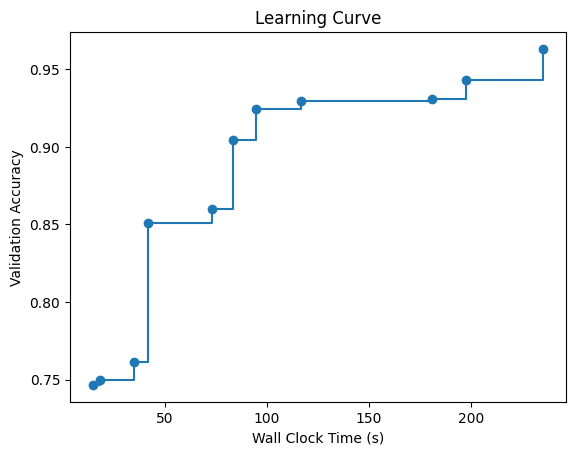

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

-----

# Submission

In [33]:
preds_sub = automl.predict(df_test)

In [34]:
preds_sub

array([2, 0, 9, ..., 3, 9, 2])

In [35]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [37]:
submission_final = pd.DataFrame({
    'ImageId': df_test.index + 1,  
    'Label': preds_sub            
})

In [38]:
submission_final

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [39]:
submission_final.to_csv('/kaggle/working/submission.csv', index=False, sep=',')

In [40]:
import os
os.listdir('/kaggle/working')

['__notebook__.ipynb', 'experiment_v0.log', 'automl.pkl', 'submission.csv']